# Road Damage Detection: A Comparison of YOLOv8 and Faster R-CNN

In [1]:
!pip install -U 'git+https://github.com/facebookresearch/detectron2.git'
!pip install tensorflow==2.12.0 tensorflow-estimator==2.12.0 tf_slim protobuf==3.20.3 --quiet
!pip install tqdm lxml pycocotools

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-hrrty_0z
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-hrrty_0z
  Resolved https://github.com/facebookresearch/detectron2.git to commit 536dc9d527074e3b15df5f6677ffe1f4e104a4ab
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 86.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.2 MB/s 

## Code Significance Overview

This section performs two important setup operations for running deep learning workflows in Google Colab:

### 1. Mounting Google Drive
Mounting Google Drive allows seamless access to files and folders stored in your Drive directly from the Colab environment. The `force_remount=True` option ensures that even if the Drive was already mounted, it will be refreshed and reconnected cleanly.

### 2. Installing Core Dependencies
The script installs three core libraries:
- **Torch**: The PyTorch library used for building and training deep learning models.
- **Torchvision**: Provides utilities for image transformations and pretrained vision models.
- **Ultralytics**: A high-level library that includes the YOLOv8 framework, enabling easy training, validation, and deployment of object detection models with a few lines of code.

These installations ensure that the environment is equipped with the latest versions of tools needed for building YOLO-based object detection pipelines.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!pip install -U torch torchvision ultralytics


Mounted at /content/drive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.2/865.2 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 393.1/393.1 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 133.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.7/897.7 kB 63.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 571.0/571.0 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.2/200.2 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.6/216.6 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

##  Library Import Significance

- **os, shutil, random**: For file operations and random sampling (e.g., train/test split).
- **cv2**: Image handling and preprocessing.
- **xml.etree.ElementTree**: Parsing XML annotations (Pascal VOC format).
- **google.colab.drive**: Mounts Google Drive in Colab for data access.
- **yaml**: Reads and writes YOLO configuration files.
- **ultralytics.YOLO**: Interface to train and evaluate YOLOv8 models.
- **time**: Measures execution time for training/inference.

In [4]:
# Importing necessary Libraries
import os
import shutil
import random
import cv2
import xml.etree.ElementTree as ET
import random
import yaml
from ultralytics import YOLO
import time
from google.colab import drive
import matplotlib.pyplot as plt
import glob
from PIL import Image as PILImage
from IPython.display import display


## 🧹 Dataset Filtering and Splitting Logic

- **Data Validation**: The script verifies that each image is readable and has a corresponding, well-formed annotation with at least one object.
- **`is_valid_image`**: Checks if the image file can be loaded properly using OpenCV.
- **`is_valid_annotation`**: Ensures the annotation XML has at least one object tag.
- **Filtering**: `filter_clean_dataset` collects only valid image-annotation pairs, ignoring corrupt or incomplete data.
- **Data Splitting**: `split_from_train_to_train_and_test` moves a random percentage of valid pairs from `train/` to `test/`, ensuring both image and annotation files stay aligned.
- **Robust Workflow**: Useful for cleaning and preparing datasets for training object detection models like YOLO or Faster R-CNN.

In [4]:
def is_valid_image(image_path):
    try:
        img = cv2.imread(image_path)
        return img is not None and img.size > 0
    except:
        return False

def is_valid_annotation(xml_path):
    try:
        root = ET.parse(xml_path).getroot()
        return root.find("object") is not None
    except:
        return False

def filter_clean_dataset(images_dir, annotations_dir):
    clean_files = []
    for filename in os.listdir(images_dir):
        if not filename.lower().endswith(('.jpg', '.jpeg', '.png')):
            continue

        base = os.path.splitext(filename)[0]
        image_path = os.path.join(images_dir, filename)
        xml_path = os.path.join(annotations_dir, f"{base}.xml")

        if os.path.exists(xml_path) and is_valid_image(image_path) and is_valid_annotation(xml_path):
            clean_files.append(filename)
        else:
            print(f"Skipping corrupt or incomplete pair: {filename}")

    print(f"\n Valid image-annotation pairs found: {len(clean_files)}")
    return clean_files

In [ ]:
# Execute only once for data split
def split_from_train_to_train_and_test(image_train_dir, annot_train_dir, test_ratio=0.2):
    image_test_dir = image_train_dir.replace("train", "test")
    annot_test_dir = annot_train_dir.replace("train", "test")

    os.makedirs(image_test_dir, exist_ok=True)
    os.makedirs(annot_test_dir, exist_ok=True)

    clean_files = filter_clean_dataset(image_train_dir, annot_train_dir)
    random.shuffle(clean_files)

    test_count = int(len(clean_files) * test_ratio)
    test_files = clean_files[:test_count]

    print(f"\nMoving {test_count} image+annotation pairs to test/")

    for filename in test_files:
        base = os.path.splitext(filename)[0]
        img_src = os.path.join(image_train_dir, filename)
        xml_src = os.path.join(annot_train_dir, f"{base}.xml")

        img_dst = os.path.join(image_test_dir, filename)
        xml_dst = os.path.join(annot_test_dir, f"{base}.xml")

        shutil.move(img_src, img_dst)
        shutil.move(xml_src, xml_dst)

    print(" Test split completed.")


image_train_path = "/content/drive/MyDrive/road_damage_detection/dataset_augmented/images/train"
annot_train_path = "/content/drive/MyDrive/road_damage_detection/dataset_augmented/annotations/train"

split_from_train_to_train_and_test(image_train_path, annot_train_path, test_ratio=0.2)

# YOLO v8 Model

##  YOLO Dataset Preparation Script

- **Google Drive Integration**: Mounts the user's Google Drive to enable reading and writing files directly from Drive.
- **Directory Setup**: Creates the required folder structure (`images/train`, `images/test`, `labels/train`, `labels/test`) under a dedicated `dataset_yolo` directory.
- **Image Migration**: Copies training and testing images from the pre-augmented dataset (`dataset_augmented`) into the YOLO-specific structure.
- **XML to YOLO Conversion**:
  - Parses Pascal VOC-style XML annotations.
  - Converts bounding boxes into YOLO format: normalized center coordinates and dimensions.
  - Dynamically adds unknown classes if found, ensuring all object categories are captured.
- **Final Output**: Results in a clean YOLO-compatible dataset layout, ready for training with Ultralytics YOLO models.

 Essential preprocessing step for training object detection models efficiently with YOLO.

In [5]:

#  Set up paths
BASE_PATH = "/content/drive/MyDrive/road_damage_detection"
AUG_IMAGE_DIR = f"{BASE_PATH}/dataset_augmented/images"
AUG_ANNOT_DIR = f"{BASE_PATH}/dataset_augmented/annotations"
YOLO_IMAGE_BASE = f"{BASE_PATH}/dataset_yolo/yolo/images"
YOLO_LABEL_BASE = f"{BASE_PATH}/dataset_yolo/yolo/labels"

for split in ['train', 'test']:
    os.makedirs(os.path.join(YOLO_IMAGE_BASE, split), exist_ok=True)
    os.makedirs(os.path.join(YOLO_LABEL_BASE, split), exist_ok=True)

# Move images from dataset_augmented to dataset_yolo
for split in ['train', 'test']:
    src_dir = os.path.join(AUG_IMAGE_DIR, split)
    dest_dir = os.path.join(YOLO_IMAGE_BASE, split)

    for file in os.listdir(src_dir):
        if file.endswith(".jpg"):
            shutil.copy(os.path.join(src_dir, file), os.path.join(dest_dir, file))

print("Images moved to YOLO folders.")

# Converting XML to YOLO format
damage_class_codes = {"D00": 0, "D01": 1, "D10": 2, "D11": 3,
                      "D20": 4, "D40": 5, "D43": 6, "D44": 7}
unknown_class = 8

def convert_xml_to_yolo(xml_path, label_output_dir, image_output_dir):
    global unknown_class
    root = ET.parse(xml_path).getroot()
    filename = root.find("filename").text
    image_src_path = os.path.join(image_output_dir, filename)
    if not os.path.exists(image_src_path):
        print(f" Skipping: Image not found for {filename}")
        return

    width = int(root.find("size/width").text)
    height = int(root.find("size/height").text)
    txt_path = os.path.join(label_output_dir, filename.replace(".jpg", ".txt"))

    with open(txt_path, "w") as f:
        for obj in root.findall("object"):
            cls = obj.find("name").text
            if cls not in damage_class_codes:
                damage_class_codes[cls] = unknown_class
                unknown_class += 1
            cls_id = damage_class_codes[cls]
            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)

            xc = ((xmin + xmax) / 2) / width
            yc = ((ymin + ymax) / 2) / height
            bw = (xmax - xmin) / width
            bh = (ymax - ymin) / height
            f.write(f"{cls_id} {xc:.6f} {yc:.6f} {bw:.6f} {bh:.6f}\n")

for split in ['train', 'test']:
    annot_dir = os.path.join(AUG_ANNOT_DIR, split)
    label_out = os.path.join(YOLO_LABEL_BASE, split)
    image_dir = os.path.join(YOLO_IMAGE_BASE, split)

    if os.path.exists(annot_dir):
        print(f" Converting {split} annotations...")
        for xml_file in os.listdir(annot_dir):
            if xml_file.endswith(".xml"):
                xml_path = os.path.join(annot_dir, xml_file)
                convert_xml_to_yolo(xml_path, label_out, image_dir)
        print(f" Done with {split} annotations.\n")

print(" YOLO dataset folder is ready in Google Drive.")

Images moved to YOLO folders.
 Converting train annotations...
 Done with train annotations.

 Converting test annotations...
 Done with test annotations.

 YOLO dataset folder is ready in Google Drive.


In [1]:
!pip uninstall -y numpy
!pip install numpy==1.24.4

Found existing installation: numpy 1.24.4
Uninstalling numpy-1.24.4:
  Successfully uninstalled numpy-1.24.4
  Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.4 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.12.0 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.24.4 which is incompatible.
blosc2 3.3.2 r

## Creating YOLOv8 Data Configuration (data.yaml)

- **Defines the dataset structure** required by YOLOv8:
  - `path`: Base directory containing image and label folders.
  - `train` and `val`: Relative paths to training and validation image folders.
  - `nc`: Number of object classes in the dataset.
  - `names`: List of class names mapped by index.

- **Writes the configuration to** `data.yaml` in Google Drive, enabling YOLOv8 to locate and interpret the dataset for training and validation.

In [2]:
yaml_content = """
path: /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo

train: images/train
val: images/test

nc: 10
names: ['D00', 'D01', 'D10', 'D11', 'D20', 'D40', 'D43', 'D44', 'D50', 'Repair']
"""

yaml_path = "/content/drive/MyDrive/road_damage_detection/dataset_yolo/data.yaml"

with open(yaml_path, "w") as f:
    f.write(yaml_content.strip())

print(f"Updated data.yaml saved at:\n{yaml_path}")

Updated data.yaml saved at:
/content/drive/MyDrive/road_damage_detection/dataset_yolo/data.yaml


##  YOLOv8 Model Training Configuration

- **Model Initialization**: Loads a lightweight YOLOv8 architecture (`yolov8n.pt`) for object detection.
- **Data Path**: Uses a pre-defined `data.yaml` file to locate training and validation data.
- **Training Parameters**:
  - `epochs`: Trains for 50 full passes over the dataset.
  - `imgsz`: Resizes input images to 640×640 for uniform processing.
  - `batch`: Processes 16 images per batch.
  - `augment`: Enables built-in data augmentations like mosaic and flipping to improve generalization.
  - `cache`: Speeds up training by caching images and labels in memory.
  - `workers`: Uses 2 parallel workers to load data efficiently.
  - `save`: Stores training checkpoints and logs.
- **Project Directory**: Saves all outputs under `yolo_runs/yolo_road_damage` in Google Drive.
- **Time Tracking**: Measures and prints total training time.

In [29]:

BASE_PATH = "/content/drive/MyDrive/road_damage_detection"
yaml_path = f"{BASE_PATH}/dataset_yolo/data.yaml"

start = time.time()

model = YOLO("yolov8n.pt")

model.train(
    data=yaml_path,
    epochs=50,
    imgsz=640,
    batch=16,
    project=f"{BASE_PATH}/yolo_runs",
    name="yolo_road_damage",
    augment=True,
    cache=True,
    workers=2,
    save=True
)

end = time.time()
print(f"Training Time: {(end - start) / 60:.2f} minutes")

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/road_damage_detection/dataset_yolo/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_road_damage, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, pat

train: Scanning /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/labels/train.cache... 2650 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2650/2650 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (3.0GB RAM): 100%|██████████| 2650/2650 [00:05<00:00, 444.35it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.3±0.1 ms, read: 76.6±21.9 MB/s, size: 144.1 KB)


val: Scanning /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/labels/test.cache... 662 images, 0 backgrounds, 0 corrupt: 100%|██████████| 662/662 [00:00<?, ?it/s]


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.8GB RAM): 100%|██████████| 662/662 [00:01<00:00, 439.61it/s]


Plotting labels to /content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.07G      1.675      3.256      1.677         34        640: 100%|██████████| 166/166 [00:16<00:00,  9.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.81it/s]


                   all        662       1891      0.503      0.255      0.276      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.07G      1.558      2.266      1.533         59        640: 100%|██████████| 166/166 [00:16<00:00, 10.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:03<00:00,  6.95it/s]


                   all        662       1891      0.523      0.387      0.383      0.212

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.07G      1.533      2.029      1.508         62        640: 100%|██████████| 166/166 [00:16<00:00, 10.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.34it/s]


                   all        662       1891      0.541      0.441      0.437       0.23

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.07G      1.498      1.819      1.469         51        640: 100%|██████████| 166/166 [00:15<00:00, 10.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.31it/s]


                   all        662       1891      0.594      0.447       0.46      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      3.07G      1.466      1.721      1.449         49        640: 100%|██████████| 166/166 [00:16<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.07it/s]


                   all        662       1891      0.519      0.483      0.506      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.07G      1.418      1.571      1.413         43        640: 100%|██████████| 166/166 [00:16<00:00, 10.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.46it/s]

                   all        662       1891      0.587      0.484      0.503      0.278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.07G      1.377      1.465      1.372         36        640: 100%|██████████| 166/166 [00:16<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.44it/s]

                   all        662       1891      0.654      0.525      0.553      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      3.07G      1.365      1.417       1.37         39        640: 100%|██████████| 166/166 [00:16<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]

                   all        662       1891      0.643      0.527      0.571      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      3.07G      1.337      1.364      1.356         40        640: 100%|██████████| 166/166 [00:16<00:00, 10.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.61it/s]

                   all        662       1891      0.684      0.544      0.583      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      3.07G      1.327      1.308      1.328         41        640: 100%|██████████| 166/166 [00:16<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.40it/s]

                   all        662       1891      0.758      0.529      0.603      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.07G      1.304      1.274      1.327         52        640: 100%|██████████| 166/166 [00:16<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.72it/s]

                   all        662       1891      0.659      0.635      0.655      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.07G      1.269      1.228      1.307         54        640: 100%|██████████| 166/166 [00:16<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]

                   all        662       1891      0.659      0.593      0.638      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.07G      1.253      1.204      1.298         49        640: 100%|██████████| 166/166 [00:16<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.63it/s]

                   all        662       1891      0.711      0.605       0.66      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      3.07G       1.24       1.17       1.29         44        640: 100%|██████████| 166/166 [00:16<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.65it/s]

                   all        662       1891      0.679      0.607      0.657      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.07G      1.232       1.14      1.276         39        640: 100%|██████████| 166/166 [00:16<00:00, 10.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.65it/s]

                   all        662       1891      0.688      0.621       0.67      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.07G      1.227      1.118      1.267         43        640: 100%|██████████| 166/166 [00:16<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.62it/s]

                   all        662       1891      0.699      0.636      0.675      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      3.07G      1.201      1.086      1.256         61        640: 100%|██████████| 166/166 [00:16<00:00,  9.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.50it/s]

                   all        662       1891      0.718      0.639      0.683      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.07G      1.183      1.053      1.249         20        640: 100%|██████████| 166/166 [00:16<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]

                   all        662       1891      0.771      0.644      0.707       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.07G      1.168      1.038      1.234         42        640: 100%|██████████| 166/166 [00:16<00:00, 10.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.62it/s]

                   all        662       1891      0.742      0.667      0.723      0.436



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      3.07G      1.163      1.023      1.226         51        640: 100%|██████████| 166/166 [00:16<00:00, 10.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.83it/s]

                   all        662       1891      0.741      0.678      0.737      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.07G      1.154      0.998      1.224         31        640: 100%|██████████| 166/166 [00:16<00:00, 10.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.66it/s]

                   all        662       1891      0.756      0.671      0.729      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.07G      1.138     0.9814      1.212         39        640: 100%|██████████| 166/166 [00:16<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.70it/s]

                   all        662       1891      0.792      0.669      0.739      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.07G      1.132     0.9705      1.217         53        640: 100%|██████████| 166/166 [00:16<00:00, 10.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.52it/s]

                   all        662       1891      0.814      0.704      0.776      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      3.07G      1.119     0.9569      1.208         50        640: 100%|██████████| 166/166 [00:16<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.27it/s]

                   all        662       1891      0.776      0.731      0.767      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.07G       1.11     0.9216      1.193         47        640: 100%|██████████| 166/166 [00:16<00:00, 10.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.81it/s]

                   all        662       1891      0.812      0.692       0.78      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.07G       1.09     0.9079      1.181         48        640: 100%|██████████| 166/166 [00:16<00:00, 10.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.77it/s]

                   all        662       1891      0.793      0.743      0.793      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.07G      1.074     0.8958      1.182         28        640: 100%|██████████| 166/166 [00:16<00:00, 10.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.66it/s]

                   all        662       1891      0.817      0.762      0.824      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      3.07G      1.063     0.8738      1.171         59        640: 100%|██████████| 166/166 [00:16<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.89it/s]

                   all        662       1891      0.769      0.782      0.815      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.07G      1.071      0.875      1.171         57        640: 100%|██████████| 166/166 [00:16<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.61it/s]

                   all        662       1891      0.824      0.774      0.828      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.07G      1.052     0.8592      1.165         38        640: 100%|██████████| 166/166 [00:16<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.51it/s]

                   all        662       1891      0.816       0.78      0.835       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.07G      1.045     0.8445      1.161         46        640: 100%|██████████| 166/166 [00:16<00:00, 10.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.60it/s]

                   all        662       1891      0.833      0.782      0.841      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.07G      1.031     0.8284      1.152         46        640: 100%|██████████| 166/166 [00:16<00:00, 10.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.76it/s]

                   all        662       1891      0.819      0.791      0.839      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.07G      1.019     0.7991      1.143         46        640: 100%|██████████| 166/166 [00:16<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.88it/s]

                   all        662       1891      0.811      0.808      0.847       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.07G      1.004     0.7944      1.134         54        640: 100%|██████████| 166/166 [00:16<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.72it/s]

                   all        662       1891      0.834      0.814      0.859      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.07G      1.002     0.7849      1.138         39        640: 100%|██████████| 166/166 [00:16<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.71it/s]

                   all        662       1891       0.82      0.805      0.866      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.07G     0.9763     0.7656      1.125         34        640: 100%|██████████| 166/166 [00:16<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.67it/s]

                   all        662       1891      0.888      0.775      0.862      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.07G     0.9836     0.7651      1.122         51        640: 100%|██████████| 166/166 [00:16<00:00, 10.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.72it/s]

                   all        662       1891      0.804      0.834      0.872      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.07G     0.9614     0.7586      1.118         68        640: 100%|██████████| 166/166 [00:16<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.54it/s]

                   all        662       1891      0.847      0.819      0.878      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.07G     0.9515     0.7323      1.103         60        640: 100%|██████████| 166/166 [00:16<00:00, 10.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.84it/s]

                   all        662       1891      0.875      0.806      0.885       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      3.07G     0.9474     0.7317      1.101         33        640: 100%|██████████| 166/166 [00:16<00:00, 10.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.68it/s]

                   all        662       1891      0.865       0.82      0.875      0.593


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      3.07G     0.9492     0.6989      1.124         20        640: 100%|██████████| 166/166 [00:15<00:00, 10.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.69it/s]

                   all        662       1891      0.885       0.82       0.89      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      3.07G     0.9216      0.668      1.106         26        640: 100%|██████████| 166/166 [00:14<00:00, 11.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.70it/s]

                   all        662       1891      0.894      0.825      0.892      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      3.07G     0.9143     0.6541        1.1         26        640: 100%|██████████| 166/166 [00:14<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.67it/s]

                   all        662       1891      0.875      0.838      0.892      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      3.07G     0.8888      0.637      1.084         24        640: 100%|██████████| 166/166 [00:14<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.83it/s]

                   all        662       1891      0.893      0.851      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      3.07G     0.8741     0.6197       1.08         35        640: 100%|██████████| 166/166 [00:14<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.63it/s]

                   all        662       1891      0.925      0.834      0.912      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      3.07G     0.8709     0.6187       1.08         33        640: 100%|██████████| 166/166 [00:14<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.82it/s]

                   all        662       1891      0.895      0.861      0.911      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      3.07G      0.858     0.6035      1.075         20        640: 100%|██████████| 166/166 [00:14<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.76it/s]

                   all        662       1891      0.899      0.872      0.924      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      3.07G     0.8391     0.5959      1.065         16        640: 100%|██████████| 166/166 [00:14<00:00, 11.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.58it/s]

                   all        662       1891      0.913      0.846      0.916       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      3.07G     0.8292     0.5883      1.064         20        640: 100%|██████████| 166/166 [00:14<00:00, 11.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.76it/s]

                   all        662       1891      0.916      0.856      0.925      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      3.07G     0.8218     0.5773       1.06         27        640: 100%|██████████| 166/166 [00:14<00:00, 11.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:02<00:00,  7.74it/s]

                   all        662       1891      0.905      0.856      0.918      0.663



50 epochs completed in 0.266 hours.
Optimizer stripped from /content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage/weights/best.pt, 6.3MB

Validating /content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 21/21 [00:04<00:00,  4.62it/s]


                   all        662       1891      0.903      0.848      0.919      0.673
                   D00        176        279      0.902      0.724      0.893      0.601
                   D01         67         98      0.874      0.852      0.924      0.674
                   D10         93        168      0.909      0.774      0.867      0.565
                   D11         21         29      0.753       0.69      0.735      0.501
                   D20        166        241       0.86      0.871      0.934      0.677
                   D40         78        112      0.961      0.885      0.958      0.577
                   D43        454        472      0.965      0.975      0.992      0.818
                   D44         77        101      0.869      0.901      0.926      0.724
                   D50        135        165      0.988      0.991      0.995       0.96
                Repair        160        226      0.944      0.819      0.966      0.632
Speed: 0.1ms preproce

##  YOLOv8 Model Evaluation

- **Model Loading**: Loads the trained YOLOv8 model from the best saved weights.
- **Dataset Configuration**: Uses the `data.yaml` file to locate test dataset images and labels.
- **Evaluation**:
  - `val()`: Runs validation on the test set and computes detection metrics.
  - **Key Metrics Printed**:
    - `mAP@0.5`: Mean Average Precision at 0.5 IoU – primary measure of detection quality.
    - `mAP@0.5:0.95`: Average over IoU thresholds from 0.5 to 0.95 – stricter accuracy measure.
    - `Mean Precision`: Average precision across all classes.
    - `Mean Recall`: Average recall across all classes.
    - `Fitness Score`: Composite metric to estimate model quality by combining mAP, precision, and recall.

This evaluation helps compare models and understand performance on unseen data.

In [30]:


BASE_PATH = "/content/drive/MyDrive/road_damage_detection"
WEIGHTS_PATH = f"{BASE_PATH}/yolo_runs/yolo_road_damage/weights/best.pt"
DATA_YAML = f"{BASE_PATH}/dataset_yolo/data.yaml"

model = YOLO(WEIGHTS_PATH)

metrics = model.val(data=DATA_YAML, split='val')

print("\n Evaluation Metrics:")
print(f"mAP@0.5:        {metrics.box.map50:.4f}")
print(f"mAP@0.5:0.95:   {metrics.box.map:.4f}")
print(f"Mean Precision: {metrics.box.mp:.4f}")
print(f"Mean Recall:    {metrics.box.mr:.4f}")
print(f"Fitness Score:  {metrics.box.fitness():.4f}")

Ultralytics 8.3.129 🚀 Python-3.11.12 torch-2.7.0+cu126 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 82.0±14.5 MB/s, size: 148.6 KB)


val: Scanning /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/labels/test.cache... 662 images, 0 backgrounds, 0 corrupt: 100%|██████████| 662/662 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 42/42 [00:06<00:00,  6.82it/s]


                   all        662       1891      0.912      0.854      0.924      0.662
                   D00        176        279      0.918      0.765      0.892      0.591
                   D01         67         98      0.896      0.788       0.92      0.642
                   D10         93        168      0.872      0.774      0.855       0.54
                   D11         21         29      0.738       0.69      0.797      0.455
                   D20        166        241      0.938      0.863      0.937      0.686
                   D40         78        112      0.971      0.911      0.977      0.576
                   D43        454        472       0.97      0.969      0.985      0.816
                   D44         77        101      0.865      0.891      0.912      0.724
                   D50        135        165      0.992      0.994      0.995      0.951
                Repair        160        226      0.962      0.898       0.97      0.641
Speed: 0.4ms preproce

##  YOLOv8 Evaluation Visualizations

This script automatically locates the latest YOLO evaluation results (e.g., from `runs/detect/val*`) and visualizes key performance plots to help assess model quality:

- **confusion_matrix.png**: Displays the confusion matrix showing true vs. predicted classes.
- **pr_curve.png**: Precision-Recall curve for understanding model performance across confidence thresholds.
- **F1_curve.png**: Visualizes the balance between precision and recall.

Each image is resized for clarity and displayed using matplotlib. These visualizations provide insights into class-wise accuracy, trade-offs, and overall model behavior.

Using YOLO evaluation results from: runs/detect/val2


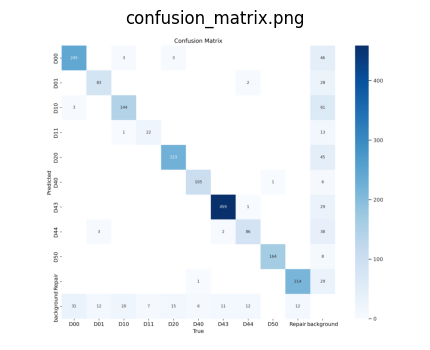

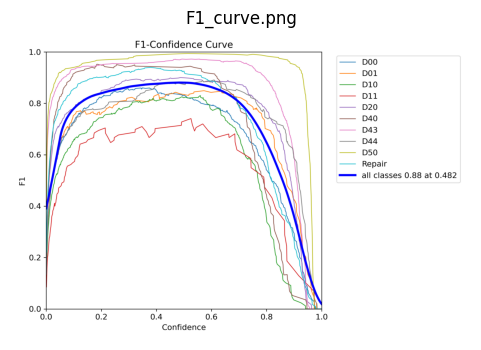

In [31]:


val_dir_root = "runs/detect"
val_subdirs = sorted([d for d in os.listdir(val_dir_root) if d.startswith("val")])
latest_val_dir = os.path.join(val_dir_root, val_subdirs[-1])

print(f"Using YOLO evaluation results from: {latest_val_dir}")

plot_files = ["confusion_matrix.png", "pr_curve.png", "F1_curve.png"]

for plot_file in plot_files:
    plot_path = os.path.join(latest_val_dir, plot_file)
    if os.path.exists(plot_path):
        img = cv2.imread(plot_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(6, 4))
        plt.imshow(img)
        plt.axis('off')
        plt.title(plot_file)
        plt.show()


##  YOLOv8 Sample Inference Visualization

This script performs inference on 5 test images using a trained YOLOv8 model and displays the predictions:

- **Automatic Sampling**: Selects 5 test images from the YOLO test folder.
- **Model Inference**: Applies the YOLO model to detect and annotate objects.
- **Output Handling**: Saves each prediction result temporarily and resizes it for optimal display.
- **Visualization**: Uses PIL and IPython to visually inspect detection outputs in a compact format.

This helps quickly verify how well the model performs on unseen examples and spot-checks class-wise predictions.


image 1/1 /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/images/test/aug_0_China_MotorBike_000000.jpg: 640x640 1 D00, 2 D20s, 1 D50, 7.9ms
Speed: 3.2ms preprocess, 7.9ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


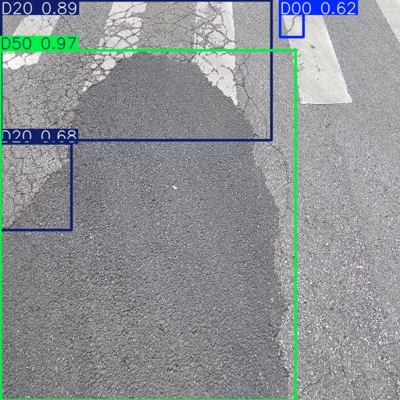


image 1/1 /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/images/test/aug_0_China_MotorBike_000004.jpg: 640x640 1 D40, 1 D50, 7.5ms
Speed: 2.6ms preprocess, 7.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


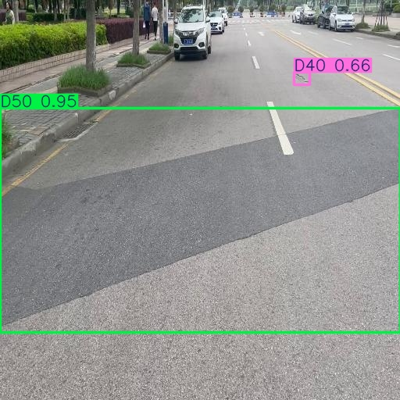


image 1/1 /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/images/test/aug_0_China_MotorBike_000025.jpg: 640x640 1 D00, 1 D10, 3 D50s, 7.8ms
Speed: 2.5ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


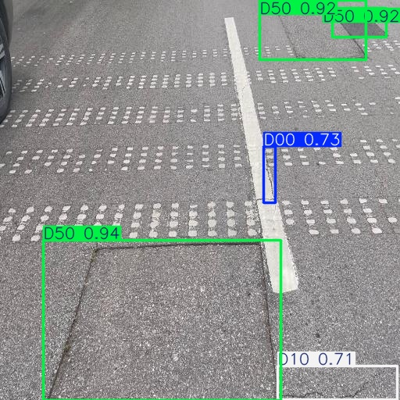


image 1/1 /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/images/test/aug_0_China_MotorBike_000138.jpg: 640x640 1 D40, 1 D50, 7.6ms
Speed: 2.7ms preprocess, 7.6ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


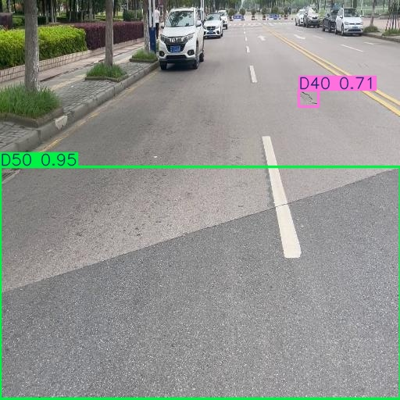


image 1/1 /content/drive/MyDrive/road_damage_detection/dataset_yolo/yolo/images/test/aug_0_China_MotorBike_000183.jpg: 640x640 1 D50, 7.8ms
Speed: 3.1ms preprocess, 7.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


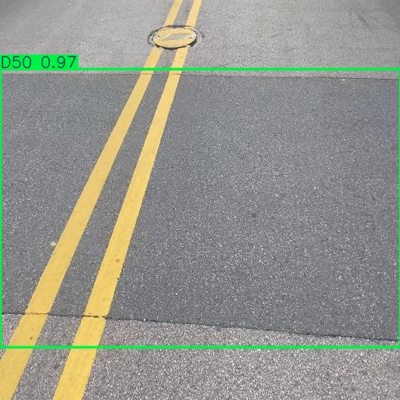

In [32]:

test_image_dir = f"{BASE_PATH}/dataset_yolo/yolo/images/test"
sample_imgs = sorted(glob.glob(test_image_dir + "/*.jpg"))[:5]

for img_path in sample_imgs:
    results = model(img_path)
    results[0].save(filename="/content/pred.jpg")


    img = PILImage.open("/content/pred.jpg")
    img.thumbnail((400, 400))
    display(img)

# Training the Faster R-CNN model using Detecron

## Installations for Detectron2 and TensorFlow Setup

- The first command installs the latest version of **Detectron2** directly from its official GitHub repository. Detectron2 is a powerful object detection and segmentation library developed by Facebook AI Research, built on top of PyTorch. Installing from source ensures you get the most updated features and bug fixes.

- The second command installs a compatible version of **TensorFlow (2.12.0)** along with necessary dependencies like `tensorflow-estimator`, `tf_slim`, and a specific `protobuf` version. These are sometimes required for compatibility with auxiliary tools or legacy support within object detection pipelines.

Together, these installations prepare your environment to work with both Detectron2 (for Faster R-CNN, Mask R-CNN, etc.) and TensorFlow-based models or utilities if needed.

In [9]:
import os
import json
import xml.etree.ElementTree as ET
from tqdm import tqdm
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.logger import setup_logger
from detectron2.engine import DefaultPredictor
from detectron2.data.catalog import MetadataCatalog
from pycocotools.cocoeval import COCOeval


from sklearn.metrics import confusion_matrix
from pycocotools.coco import COCO


##  XML to COCO Format Conversion for Road Damage Dataset

This script converts a dataset in Pascal VOC (XML) format into COCO JSON format, which is required for training and evaluating object detection models like Faster R-CNN in Detectron2.

###  Key Functionalities:
- **Directory Verification**: Ensures necessary annotation and image folders for both train and test splits exist.
- **Class Mapping**: Defines a consistent `name → ID` mapping for 10 road damage classes.
- **Data Inspection**: Prints basic statistics to verify the number of annotations and images.
- **Conversion Logic**: Parses each XML file, extracts bounding boxes and class labels, and converts them into COCO-compliant dictionaries.
- **Output**: Saves separate `train.json` and `test.json` files in a designated output directory (`dataset_coco`) for direct use with COCO-based training pipelines.

This modular approach ensures clean, reproducible conversion for any downstream object detection workflow.

In [10]:

BASE_PATH = "/content/drive/MyDrive/road_damage_detection"
ANNOT_TRAIN = f"{BASE_PATH}/dataset_augmented/annotations/train"
ANNOT_TEST = f"{BASE_PATH}/dataset_augmented/annotations/test"
IMG_TRAIN = f"{BASE_PATH}/dataset_augmented/images/train"
IMG_TEST = f"{BASE_PATH}/dataset_augmented/images/test"
COCO_DIR = f"{BASE_PATH}/dataset_coco"
COCO_TRAIN = os.path.join(COCO_DIR, "train.json")
COCO_TEST = os.path.join(COCO_DIR, "test.json")

class_name_to_id = {
    "D00": 0, "D01": 1, "D10": 2, "D11": 3,
    "D20": 4, "D40": 5, "D43": 6, "D44": 7,
    "D50": 8, "Repair": 9
}

for path in [ANNOT_TRAIN, ANNOT_TEST, IMG_TRAIN, IMG_TEST, COCO_DIR]:
    if not os.path.exists(path):
        os.makedirs(path, exist_ok=True)
        print(f" Created missing directory: {path}")
    else:
        print(f" Directory exists: {path}")

print("\n Data Summary:")
print("Train Annotations:", len(os.listdir(ANNOT_TRAIN)))
print("Test Annotations :", len(os.listdir(ANNOT_TEST)))
print("Train Images     :", len(os.listdir(IMG_TRAIN)))
print("Test Images      :", len(os.listdir(IMG_TEST)))

def xml_to_coco(xml_folder, img_folder, output_json_path, class_name_to_id):
    annotation_id = 1
    coco_dict = {
        "images": [],
        "annotations": [],
        "categories": [{"id": i, "name": name, "supercategory": "none"} for name, i in class_name_to_id.items()]
    }

    image_id = 1
    for xml_file in tqdm(sorted(os.listdir(xml_folder))):
        if not xml_file.endswith(".xml"):
            continue
        xml_path = os.path.join(xml_folder, xml_file)
        tree = ET.parse(xml_path)
        root = tree.getroot()

        filename = root.find("filename").text
        width = int(root.find("size/width").text)
        height = int(root.find("size/height").text)

        coco_dict["images"].append({
            "id": image_id,
            "file_name": filename,
            "width": width,
            "height": height
        })

        for obj in root.findall("object"):
            cls = obj.find("name").text
            if cls not in class_name_to_id:
                continue
            cls_id = class_name_to_id[cls]

            bbox = obj.find("bndbox")
            xmin = int(bbox.find("xmin").text)
            ymin = int(bbox.find("ymin").text)
            xmax = int(bbox.find("xmax").text)
            ymax = int(bbox.find("ymax").text)
            w = xmax - xmin
            h = ymax - ymin

            coco_dict["annotations"].append({
                "id": annotation_id,
                "image_id": image_id,
                "category_id": cls_id,
                "bbox": [xmin, ymin, w, h],
                "area": w * h,
                "iscrowd": 0
            })
            annotation_id += 1

        image_id += 1

    with open(output_json_path, "w") as f:
        json.dump(coco_dict, f, indent=4)
    print(f" COCO file saved to: {output_json_path}")

xml_to_coco(ANNOT_TRAIN, IMG_TRAIN, COCO_TRAIN, class_name_to_id)
xml_to_coco(ANNOT_TEST, IMG_TEST, COCO_TEST, class_name_to_id)

 Directory exists: /content/drive/MyDrive/road_damage_detection/dataset_augmented/annotations/train
 Directory exists: /content/drive/MyDrive/road_damage_detection/dataset_augmented/annotations/test
 Directory exists: /content/drive/MyDrive/road_damage_detection/dataset_augmented/images/train
 Directory exists: /content/drive/MyDrive/road_damage_detection/dataset_augmented/images/test
 Created missing directory: /content/drive/MyDrive/road_damage_detection/dataset_coco

 Data Summary:
Train Annotations: 2650
Test Annotations : 662
Train Images     : 2650
Test Images      : 662


100%|██████████| 2650/2650 [00:25<00:00, 102.47it/s]


 COCO file saved to: /content/drive/MyDrive/road_damage_detection/dataset_coco/train.json


100%|██████████| 662/662 [00:02<00:00, 256.47it/s]

 COCO file saved to: /content/drive/MyDrive/road_damage_detection/dataset_coco/test.json


## Dataset Registration with Detectron2

This snippet registers the training and testing datasets in COCO format using Detectron2's `register_coco_instances` utility.

###  Key Points:
- Associates `train.json` and `test.json` with their respective image directories.
- Assigns dataset names `"rd_train"` and `"rd_test"` for use in model training and evaluation configs.
- Enables seamless integration with Detectron2's data loader, evaluator, and visualizer.

Registering datasets like this is essential for Detectron2 to recognize and access the data during training and inference workflows.

In [11]:
register_coco_instances("rd_train", {}, "/content/drive/MyDrive/road_damage_detection/dataset_coco/train.json", "/content/drive/MyDrive/road_damage_detection/dataset_augmented/images/train")
register_coco_instances("rd_test", {}, "/content/drive/MyDrive/road_damage_detection/dataset_coco/test.json", "/content/drive/MyDrive/road_damage_detection/dataset_augmented/images/test")

##  Training Faster R-CNN with Detectron2

This script configures and launches training for a Faster R-CNN model using Detectron2 on a COCO-format road damage dataset.

### Key Highlights:
- **Model**: Uses a pre-configured Faster R-CNN with ResNet-50 and FPN from Detectron2’s model zoo.
- **Datasets**: `"rd_train"` and `"rd_test"` registered via COCO format.
- **Hyperparameters**:
  - `BASE_LR`: 0.00025
  - `MAX_ITER`: 7000
  - `IMS_PER_BATCH`: 2
  - `NUM_CLASSES`: 10 (based on road damage categories)
- **Output**: All checkpoints and logs are saved to `detectron_runs` in Google Drive.

###  Trainer:
Uses `DefaultTrainer`, which handles model loading, training loop, checkpointing, and evaluation with minimal custom code.

In [12]:

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))

cfg.DATASETS.TRAIN = ("rd_train",)
cfg.DATASETS.TEST = ("rd_test",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 7000
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 10
cfg.OUTPUT_DIR = "/content/drive/MyDrive/road_damage_detection/detectron_runs"

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[05/08 23:11:20 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_280758.pkl: 167MB [00:02, 79.3MB/s]                          
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


[05/08 23:11:22 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.11/dist-packages/torch/functional.py:554: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4314.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[05/08 23:11:24 d2.utils.events]:  eta: 0:08:32  iter: 19  total_loss: 2.81  loss_cls: 2.33  loss_box_reg: 0.05371  loss_rpn_cls: 0.3013  loss_rpn_loc: 0.03133    time: 0.0888  last_time: 0.0758  data_time: 0.0132  last_data_time: 0.0031   lr: 4.9953e-06  max_mem: 2723M
[05/08 23:11:32 d2.utils.events]:  eta: 0:08:41  iter: 39  total_loss: 2.624  loss_cls: 2.195  loss_box_reg: 0.05717  loss_rpn_cls: 0.406  loss_rpn_loc: 0.03472    time: 0.1270  last_time: 0.0906  data_time: 0.0869  last_data_time: 0.0043   lr: 9.9903e-06  max_mem: 2723M
[05/08 23:11:33 d2.utils.events]:  eta: 0:08:58  iter: 59  total_loss: 2.293  loss_cls: 1.879  loss_box_reg: 0.05213  loss_rpn_cls: 0.2721  loss_rpn_loc: 0.03509    time: 0.1133  last_time: 0.0872  data_time: 0.0044  last_data_time: 0.0043   lr: 1.4985e-05  max_mem: 2723M
[05/08 23:11:35 d2.utils.events]:  eta: 0:08:59  iter: 79  total_loss: 2.024  loss_cls: 1.514  loss_box_reg: 0.182  loss_rpn_cls: 0.3206  loss_rpn_loc: 0.0376    time: 0.1060  last_tim

## Evaluation and Visualization with Detectron2

This script evaluates the performance of a trained Faster R-CNN model using COCO-style metrics and visualizes predictions on sample test images.

###  Evaluation
- **Evaluator**: Uses `COCOEvaluator` on the `rd_test` dataset.
- **Metrics**: Includes mAP@0.5, mAP@0.5:0.95, and class-wise precision/recall.

###  Inference & Visualization
- **Predictor**: Utilizes `DefaultPredictor` for running inference on images.
- **Visualizer**: Overlays bounding boxes and class labels using Detectron2’s `Visualizer`.
- **Samples**: Randomly selects 3 images from the test set for demonstration.

###  Output
- Prints evaluation metrics.
- Displays prediction results with bounding boxes and labels using `matplotlib`.

This provides an end-to-end evaluation and visual check of detection performance on real data.

[05/08 23:21:09 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [05/08 23:21:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/08 23:21:09 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/08 23:21:09 d2.data.datasets.coco]: Loaded 662 images in COCO format from /content/drive/MyDrive/road_damage_detection/dataset_coco/test.json
[05/08 23:21:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/08 23:21:09 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/08 23:21:09 d2.data.common]: Serializing 662 elements to byte tensors and concatenating them all ...
[05/08 23:21:09 d2.data.common]

roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


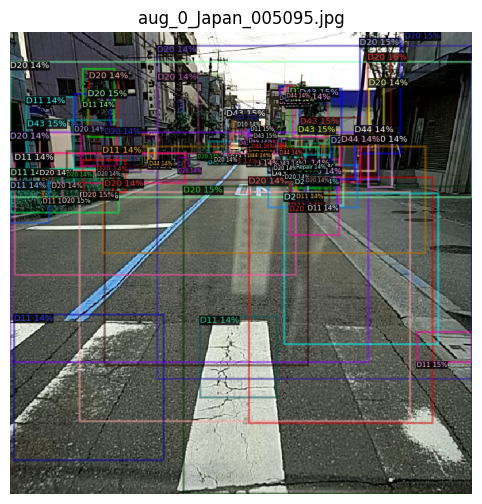

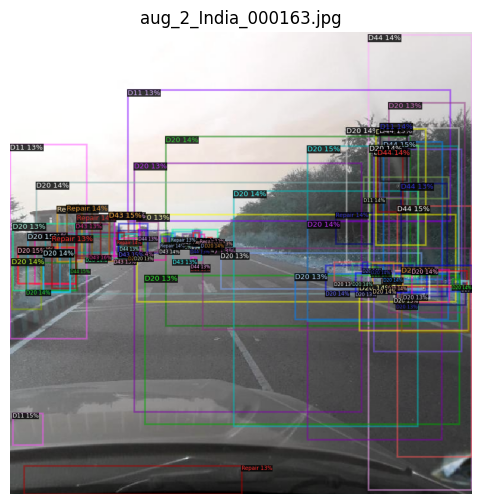

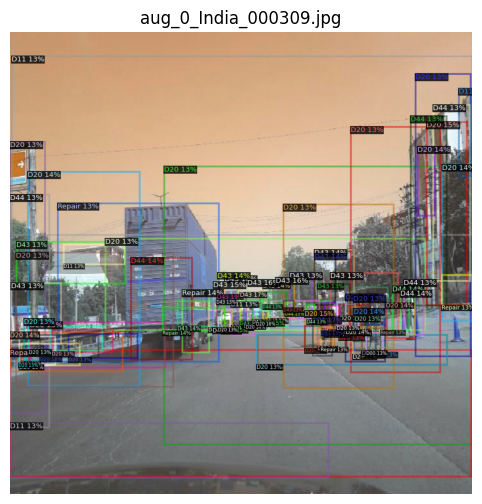

In [13]:
setup_logger()

evaluator = COCOEvaluator("rd_test", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "rd_test")
metrics = inference_on_dataset(trainer.model, val_loader, evaluator)
print("Evaluation Metrics:", metrics)

predictor = DefaultPredictor(cfg)
metadata = MetadataCatalog.get("rd_test")

test_dir = os.path.join(BASE_PATH, "dataset_augmented/images/test")
test_imgs = [f for f in os.listdir(test_dir) if f.endswith(".jpg")]
sample_imgs = random.sample(test_imgs, 3)

for img_name in sample_imgs:
    img_path = os.path.join(test_dir, img_name)
    img = cv2.imread(img_path)
    outputs = predictor(img)

    v = Visualizer(img[:, :, ::-1], metadata=metadata, scale=1.2)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

    plt.figure(figsize=(10, 6))
    plt.imshow(out.get_image()[:, :, ::-1])
    plt.title(img_name)
    plt.axis("off")
    plt.show()

##  Detectron2 Evaluation with COCO-style Metrics

This script evaluates a trained Faster R-CNN model using the COCO evaluation protocol and extracts detailed performance metrics.

###  Step-by-Step Breakdown

1. **COCOEvaluator**:
   - Evaluates the model on the `rd_test` dataset.
   - Computes mAP and class-wise metrics using Detectron2's built-in evaluator.

2. **Predictions**:
   - Loads predictions saved to `coco_instances_results.json`.

3. **Ground Truth Loading**:
   - Ground truth annotations are loaded from the `test.json` file using `pycocotools.COCO`.

4. **COCOeval**:
   - Initializes COCO evaluation for bounding boxes.
   - Computes and prints key metrics:
     - **mAP@0.5:0.95**
     - **mAP@0.5**
     - **Average Recall (AR)**
     - **Mean Precision and Recall**

###  Output
- Detailed evaluation including precision and recall at multiple IoU thresholds.
- Provides insights into model robustness across classes and bounding box sizes.

In [14]:


evaluator = COCOEvaluator("rd_test", cfg, False, output_dir=cfg.OUTPUT_DIR)
val_loader = build_detection_test_loader(cfg, "rd_test")
metrics = inference_on_dataset(trainer.model, val_loader, evaluator)

ap = metrics['bbox']['AP']
ap50 = metrics['bbox']['AP50']

preds_path = os.path.join(cfg.OUTPUT_DIR, "coco_instances_results.json")
with open(preds_path, "r") as f:
    predictions = json.load(f)

gt_path = "/content/drive/MyDrive/road_damage_detection/dataset_coco/test.json"
coco_gt = COCO(gt_path)
coco_dt = coco_gt.loadRes(preds_path)

coco_eval = COCOeval(coco_gt, coco_dt, iouType='bbox')
coco_eval.evaluate()
coco_eval.accumulate()
coco_eval.summarize()

mean_precision = coco_eval.stats[0]
mean_recall = coco_eval.stats[8]





[05/08 23:21:39 d2.evaluation.coco_evaluation]: Fast COCO eval is not built. Falling back to official COCO eval.
WARNING [05/08 23:21:39 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
WARNING [05/08 23:21:39 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/08 23:21:39 d2.data.datasets.coco]: Loaded 662 images in COCO format from /content/drive/MyDrive/road_damage_detection/dataset_coco/test.json
[05/08 23:21:39 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[05/08 23:21:39 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[05/08 23:21:39 d2.data.common]: Serializing 662 elements to byte tensors and concatenating them all ...
[05/08 23:21:39 d2.data.common]

In [16]:
print("\n Evaluation Metrics (Detectron2 - Faster R-CNN):")
print(f"mAP@0.5:        {ap50:.4f}")
print(f"mAP@0.5:0.95:   {ap:.4f}")
print(f"Mean Precision: {mean_precision:.4f}")
print(f"Mean Recall:    {mean_recall:.4f}")
print(f"Fitness Score:  {(ap / 100 + mean_precision + mean_recall)/3:.4f}")




 Evaluation Metrics (Detectron2 - Faster R-CNN):
mAP@0.5:        73.2229
mAP@0.5:0.95:   40.1511
Mean Precision: 0.4015
Mean Recall:    0.5534
Fitness Score:  0.4521


loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


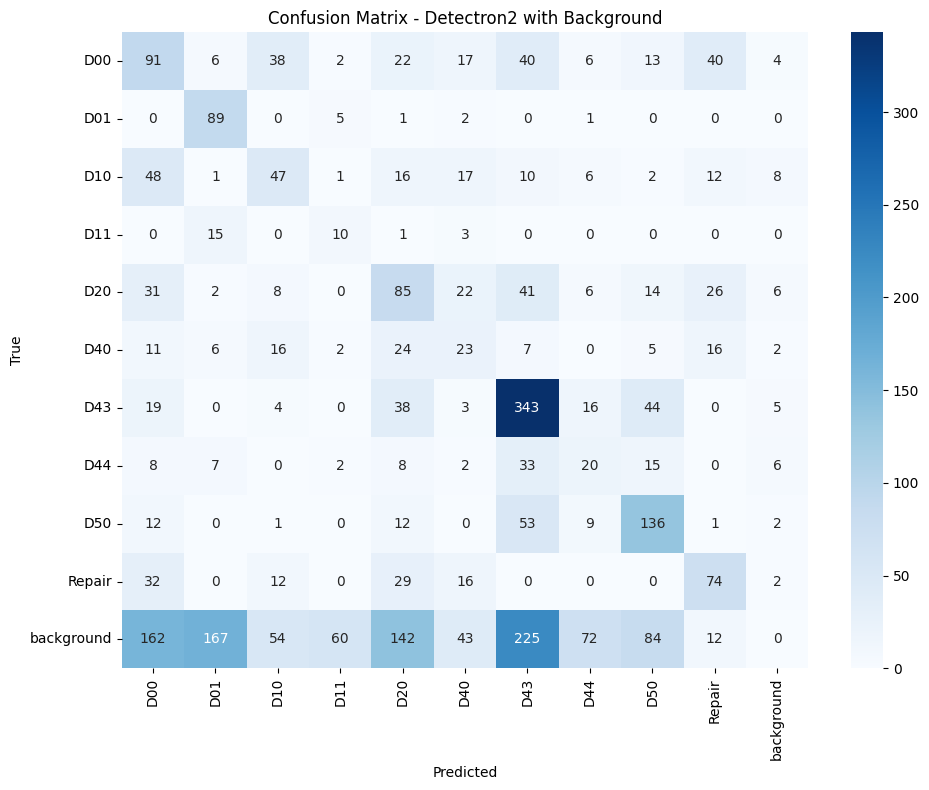

In [17]:



gt_path = "/content/drive/MyDrive/road_damage_detection/dataset_coco/test.json"
preds_path = "/content/drive/MyDrive/road_damage_detection/detectron_runs/coco_instances_results.json"

coco_gt = COCO(gt_path)

with open(preds_path, "r") as f:
    predictions = json.load(f)

cat_ids = coco_gt.getCatIds()
cat_id_to_idx = {cat_id: idx for idx, cat_id in enumerate(sorted(cat_ids))}
num_classes = len(cat_ids)
background_idx = num_classes

y_true, y_pred = [], []

for img_id in coco_gt.getImgIds():
    gt_ann_ids = coco_gt.getAnnIds(imgIds=img_id)
    gt_anns = coco_gt.loadAnns(gt_ann_ids)
    gt_labels = [cat_id_to_idx[ann['category_id']] for ann in gt_anns]

    dt_labels = [cat_id_to_idx[p['category_id']] for p in predictions if p['image_id'] == img_id and p['score'] > 0.5]

    max_len = max(len(gt_labels), len(dt_labels))
    gt_labels += [background_idx] * (max_len - len(gt_labels))
    dt_labels += [background_idx] * (max_len - len(dt_labels))

    y_true.extend(gt_labels)
    y_pred.extend(dt_labels)

cm = confusion_matrix(y_true, y_pred, labels=list(range(num_classes + 1)))

class_names = [cat["name"] for cat in coco_gt.loadCats(cat_ids)]
class_names.append("background")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Detectron2 with Background")
plt.tight_layout()
plt.show()

##  YOLO vs Faster R-CNN: Metric Comparison Bar Chart

This script visualizes a side-by-side comparison of key performance metrics between two object detection models: **YOLOv8** and **Faster R-CNN**.

###  Metrics Compared
- **mAP@0.5**: Mean Average Precision at 0.5 IoU threshold.
- **mAP@0.5:0.95**: Average Precision across multiple IoU thresholds (COCO standard).
- **Precision**: Correct positive predictions over all positive predictions.
- **Recall**: Correct positive predictions over all ground truth positives.
- **Fitness Score**: Custom metric calculated as the average of mAP@0.5:0.95, precision, and recall.

###  Plot Description
- Few sets of bars represent YOLO and Faster R-CNN scores for each metric.
- Scores are annotated above each bar for clarity.
- A horizontal grid improves readability and comparison.

###  Insight
This visualization helps in **quickly assessing the trade-offs** between speed-focused (YOLO) and accuracy-focused (Faster R-CNN) models based on quantitative metrics.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import time
import cv2
from detectron2.engine import DefaultPredictor


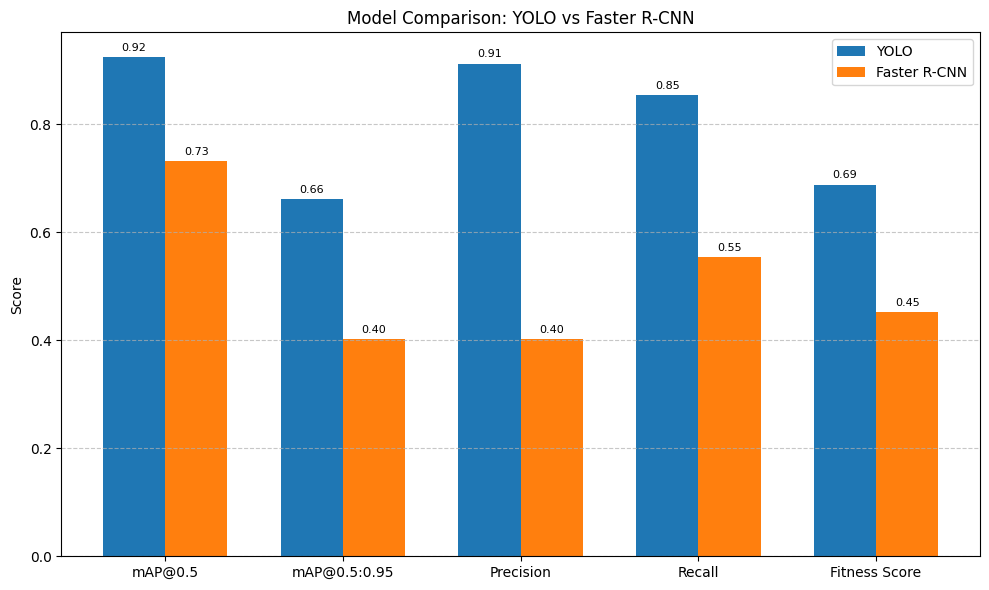

In [38]:
metrics = ["mAP@0.5", "mAP@0.5:0.95", "Precision", "Recall", "Fitness Score"]

yolo_values = [0.9241, 0.6621, 0.9123, 0.8542, 0.6883]
faster_rcnn_values = [0.7322, 0.4015, 0.4015, 0.5534, 0.4521]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, yolo_values, width, label="YOLO")
bars2 = ax.bar(x + width/2, faster_rcnn_values, width, label="Faster R-CNN")

ax.set_ylabel("Score")
ax.set_title("Model Comparison: YOLO vs Faster R-CNN")
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

##  YOLOv8 Inference Timing Script

This script measures the inference speed of a **YOLOv8 model** on a single image using OpenCV and the Ultralytics library.

###  Key Functions
- `time.time()`: Used before and after inference to compute elapsed time.
- `model(img)`: Runs inference on the input image using the loaded YOLO model.

###  Output Metrics
- **Inference Time** (in milliseconds): Measures how long the model takes to predict on one image.
- **FPS (Frames Per Second)**: Indicates how many images the model could theoretically process per second, helpful for evaluating real-time performance.

###  Use Case
This benchmark is crucial for assessing model suitability in **real-time applications** such as surveillance, autonomous driving, or mobile deployment.

In [34]:
img_path = "/content/drive/MyDrive/road_damage_detection/dataset_augmented/images/test/aug_0_India_007629.jpg"
img = cv2.imread(img_path)

model = YOLO("/content/drive/MyDrive/road_damage_detection/yolo_runs/yolo_road_damage/weights/best.pt")

start = time.time()
results = model(img)
end = time.time()

inference_time = (end - start) * 1000
fps = 1 / (end - start)
print(f"🕒 YOLO Inference Time: {inference_time:.2f} ms  | FPS: {fps:.2f}")


0: 640x640 2 D01s, 7.0ms
Speed: 2.7ms preprocess, 7.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
🕒 YOLO Inference Time: 115.10 ms  | FPS: 8.69


##  Faster R-CNN Inference Timing Script (Detectron2)

This script evaluates the inference time of a **Faster R-CNN model** from the Detectron2 library on a single image.

###  Components
- `DefaultPredictor(cfg)`: Initializes a Detectron2 predictor with the given configuration.
- `predictor(img)`: Performs inference on the loaded image.
- `time.time()`: Used before and after prediction to calculate elapsed time.

###  Output Metrics
- **Inference Time**: Time taken to process one image (in milliseconds).
- **FPS (Frames Per Second)**: Frames the model can handle per second, indicating real-time readiness.

###  Purpose
Helps assess the **efficiency and latency** of the Detectron2 Faster R-CNN model for applications like live detection or embedded systems.

In [36]:
predictor = DefaultPredictor(cfg)

start = time.time()
outputs = predictor(img)
end = time.time()

inference_time = (end - start) * 1000
fps = 1 / (end - start)
print(f" Faster R-CNN Inference Time: {inference_time:.2f} ms  | FPS: {fps:.2f}")

[05/08 23:49:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}


 Faster R-CNN Inference Time: 50.08 ms  | FPS: 19.97


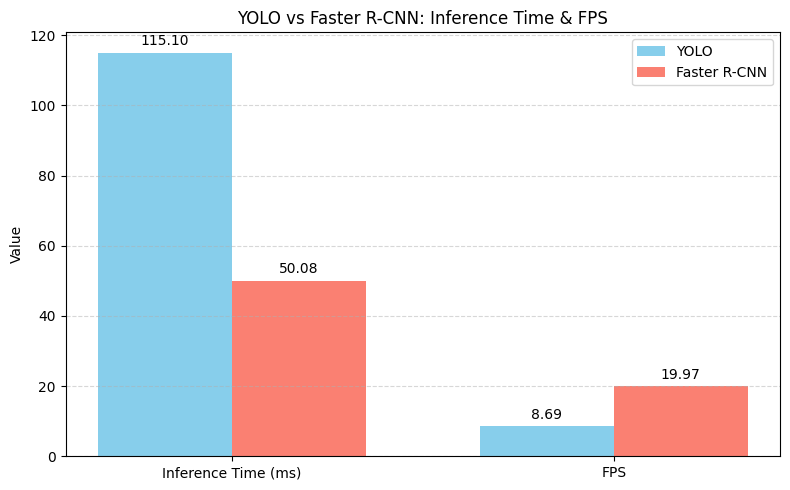

In [37]:
yolo_time_ms = 115.10
faster_rcnn_time_ms = 50.08


yolo_fps = 1000 / yolo_time_ms
faster_rcnn_fps = 1000 / faster_rcnn_time_ms


metrics = ['Inference Time (ms)', 'FPS']
yolo_values = [yolo_time_ms, yolo_fps]
faster_rcnn_values = [faster_rcnn_time_ms, faster_rcnn_fps]


x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, yolo_values, width, label='YOLO', color='skyblue')
bars2 = ax.bar(x + width/2, faster_rcnn_values, width, label='Faster R-CNN', color='salmon')


ax.set_ylabel('Value')
ax.set_title('YOLO vs Faster R-CNN: Inference Time & FPS')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
ax.grid(True, axis='y', linestyle='--', alpha=0.5)


for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords='offset points',
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()